# Group Information

- **Group Members** = Kajal Patel
- **Data Portion** = Year 2021

# About the Project


## Introduction

The Financial Statement Data Set is a comprehensive resource created by the U.S. Securities and Exchange Commission (SEC) to facilitate the analysis and consumption of financial data submitted by public companies. This dataset is derived from the EX-101 attachments to various filings, which utilize the eXtensible Business Reporting Language (XBRL) to present structured financial information.



## Key Features of the Dataset
The dataset includes quarterly and annual numeric data from primary financial statements, which encompass:

1. Balance Sheet
2. IncomeStatement
3. CashFlowStatement
4. Changesin Equity
5. Comprehensive Income




## Structure
The dataset consists of four key components:

1. **Submission Data Set (SUB)**: Contains records for each XBRL submission, providing essential information about the filing entity and the submission itself.

2. **Number Data Set (NUM)**: Includes individual numeric values reported in the primary financial statements, detailing every line item from each submission.

3. **Tag Data Set (TAG)**: Provides metadata about the tags used in the submissions, including documentation labels, taxonomy versions, and tag attributes.

4. **Presentation Data Set (PRE)**: Offers insights into how tags and corresponding numbers were presented in the financial statements, including their sequence and structure.

**Update Frequency**: The Financial Statement Data Set is updated quarterly, incorporating data from filings submitted after the close of business on the last day of the quarter. This ensures users have access to the most recent financial information available.


# Setup

## Mounting Google Drive

In [ ]:
# Mount Google Drive to access the data files
from google.colab import drive
drive.mount('/content/drive')

# File Path
data_dir = '/content/drive/My Drive/Big_Data_Project_2/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [ ]:
# Installing necessary libraries for working with Parquet
!pip install pyarrow fastparquet

# Importing required libraries
import pandas as pd
import os

In [ ]:
import numpy as np

In [ ]:
!pip install python-dotenv
!pip install neo4j

In [ ]:
!pip install neo4j yfiles_jupyter_graphs_for_neo4j

In [ ]:
from dotenv import load_dotenv
import os
from neo4j import GraphDatabase

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pip install openai==0.28

In [ ]:
import openai

In [ ]:

from sklearn.preprocessing import StandardScaler


In [ ]:
from neo4j.exceptions import SessionExpired, ServiceUnavailable, DatabaseError
import time

In [ ]:
# Replace with the actual path to your .env file in Google Drive
env_path = '/content/drive/MyDrive/Big_Data_Project_2/./.env'
load_dotenv(dotenv_path=env_path)

True

In [ ]:
openai.api_key = os.getenv('OPENAI_API_KEY')

In [ ]:
# Get credentials from environment variables
uri = os.getenv('NEO4J_URI')  # Neo4j instance URI
username = os.getenv('NEO4J_USERNAME')  # Neo4j username (usually 'neo4j')
password = os.getenv('NEO4J_PASSWORD')  # Neo4j instance password

In [ ]:
driver = GraphDatabase.driver(uri, auth=(username, password))

In [ ]:
# Test the connection
def test_connection():
    with driver.session() as session:
        greeting = session.run("RETURN 'Connection successful!' AS message")
        for record in greeting:
            print(record["message"])

# Test the Neo4j connection
test_connection()

Connection successful!


#Pre-Processing


## Converting .txt files to .csv

In [ ]:
# Function to convert .txt file to .csv if not already present
def convert_txt_to_csv(txt_file_path, csv_file_path):
    # Checking if the .csv file already exists
    if not os.path.exists(csv_file_path):
        # Read the .txt file using tab as the delimiter
        df = pd.read_csv(txt_file_path, delimiter='\t', low_memory=False)

        # Save the DataFrame as a .csv file
        df.to_csv(csv_file_path, index=False)
        print(f'Converted {txt_file_path} to {csv_file_path}')

        # Validation: Check if the file was created
        if os.path.exists(csv_file_path):
            print(f'Success: {csv_file_path} created successfully.')
        else:
            print(f'Error: Failed to create {csv_file_path}.')
    else:
        print(f'{csv_file_path} already exists. Skipping conversion.')

In [ ]:
# File Names
quarters = ['2021q1', '2021q2', '2021q3', '2021q4']
files = ['sub.txt', 'num.txt', 'pre.txt', 'tag.txt']

In [ ]:
quarters_dict = {
    '2021q1': 'q1',
    '2021q2': 'q2',
    '2021q3': 'q3',
    '2021q4': 'q4'
}

In [ ]:
for quarter in quarters:
    csv_folder = os.path.join(data_dir, quarter, 'csv_files')
    os.makedirs(csv_folder, exist_ok=True)  # Create csv_files folder if it doesn't exist

    for file in files:
        txt_file_path = os.path.join(data_dir, quarter, file)
        csv_file_path = os.path.join(csv_folder, file.replace('.txt', '.csv'))
        convert_txt_to_csv(txt_file_path, csv_file_path)

/content/drive/My Drive/Big_Data_Project_2/2021q1/csv_files/sub.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q1/csv_files/num.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q1/csv_files/pre.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q1/csv_files/tag.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/csv_files/sub.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/csv_files/num.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/csv_files/pre.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/csv_files/tag.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q3/csv_files/sub.csv already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q3/csv_f

## Converting .csv files to .parquet

In [ ]:
# Function to convert .csv file to .parquet if not already present
def convert_csv_to_parquet(csv_file_path, parquet_file_path):
    # Checking if the .parquet file already exists
    if not os.path.exists(parquet_file_path):
        # Read the .csv file
        df = pd.read_csv(csv_file_path, low_memory=False)

        # Save the DataFrame as a .parquet file
        df.to_parquet(parquet_file_path, index=False)
        print(f'Converted {csv_file_path} to {parquet_file_path}')

        # Validation: Check if the file was created
        if os.path.exists(parquet_file_path):
            print(f'Success: {parquet_file_path} created successfully.')
        else:
            print(f'Error: Failed to create {parquet_file_path}.')
    else:
        print(f'{parquet_file_path} already exists. Skipping conversion.')

In [ ]:
for quarter in quarters:
    parquet_folder = os.path.join(data_dir, quarter, 'parquet_files')
    os.makedirs(parquet_folder, exist_ok=True)  # Create parquet_files folder if it doesn't exist

    csv_folder = os.path.join(data_dir, quarter, 'csv_files')

    for file in files:
        csv_file_path = os.path.join(csv_folder, file.replace('.txt', '.csv'))
        parquet_file_path = os.path.join(parquet_folder, file.replace('.txt', '.parquet'))
        convert_csv_to_parquet(csv_file_path, parquet_file_path)

/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/sub.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/num.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/pre.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/tag.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/sub.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/num.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/pre.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/tag.parquet already exists. Skipping conversion.
/content/drive/My Drive/Big_Data_Project_2/2021q3/parquet_files/sub.parquet already exists. Skip

## Handling missing values

In [ ]:
# Function to handle missing values in the dataset
def handle_missing_values(parquet_file_path):
    # Read the .parquet file
    df = pd.read_parquet(parquet_file_path)

    # Drop columns that are entirely null
    df_cleaned = df.dropna(axis=1, how='all')

    # For object columns, leave NaN as-is, but use .loc[] to avoid SettingWithCopyWarning
    for col in df_cleaned.columns:
        if df_cleaned[col].dtype == 'object':
            df_cleaned.loc[:, col] = df_cleaned[col]  # explicitly using .loc[] to avoid the warning

    # Save the cleaned DataFrame back to Parquet
    df_cleaned.to_parquet(parquet_file_path, index=False)
    print(f'Handled missing values for {parquet_file_path}')

In [ ]:
for quarter in quarters:
    parquet_folder = os.path.join(data_dir, quarter, 'parquet_files')

    for file in files:
        parquet_file_path = os.path.join(parquet_folder, file.replace('.txt', '.parquet'))
        handle_missing_values(parquet_file_path)

Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/sub.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/num.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/pre.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/tag.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/sub.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/num.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/pre.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/tag.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/2021q3/parquet_files/sub.parquet
Handled missing values for /content/drive/My Drive/Big_Data_Project_2/202

## Converting format for date columns

Adding this step, to handle the possiblity of having to encounter junk values in some rows.

In [ ]:
# Function to check if a string is in the format YYYY-MM-DD
def is_in_desired_format(date_str):
    try:
        # Try to parse the date using the desired format (YYYY-MM-DD)
        pd.to_datetime(date_str, format='%Y-%m-%d')
        return True
    except (ValueError, TypeError):
        return False

In [ ]:
# Function to convert specific date columns to a consistent format (YYYY-MM-DD) if not already in that format
def convert_date_columns(parquet_file_path):
    # Read the .parquet file
    df = pd.read_parquet(parquet_file_path)

    # List of potential date columns and their formats
    date_columns = {
        'filed': '%y%m%d',    # yymmdd format
        'accepted': '%y%m%d', # yymmdd format
        'ddate': '%Y%m%d',    # yyyymmdd format
        'period': '%y%m%d'    # yymmdd format
    }

    # Loop through the date columns and check if conversion is needed
    for col, date_format in date_columns.items():
        if col in df.columns:
            # Check if the first few non-null values are already in the desired format
            sample_values = df[col].dropna().head(5)
            if all(is_in_desired_format(val) for val in sample_values):
                print(f'{col} is already in YYYY-MM-DD format. Skipping conversion.')
            else:
                # Convert to datetime using the provided format and then to YYYY-MM-DD
                df[col] = pd.to_datetime(df[col], format=date_format, errors='coerce').dt.strftime('%Y-%m-%d')
                print(f'Converted {col} to YYYY-MM-DD format.')

    # Save the DataFrame with date conversions back to Parquet
    df.to_parquet(parquet_file_path, index=False)
    print(f'Date columns checked and converted (if needed) for {parquet_file_path}')

In [ ]:
# Apply the date conversion function to all .parquet files in parquet_files folder
for quarter in quarters:
    parquet_folder = os.path.join(data_dir, quarter, 'parquet_files')

    for file in files:
        parquet_file_path = os.path.join(parquet_folder, file.replace('.txt', '.parquet'))
        convert_date_columns(parquet_file_path)

Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/sub.parquet
ddate is already in YYYY-MM-DD format. Skipping conversion.
Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/num.parquet
Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/pre.parquet
Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/tag.parquet
Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/sub.parquet
ddate is already in YYYY-MM-DD format. Skipping conversion.
Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/num.parquet
Date columns checked and converted (if needed) for /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/pre

## Cleaning the files




In [ ]:

def clean_and_save_files_pandas(quarter_folder, quarter_prefix, data_dir):
    """
    Reads the four parquet files for a quarter using Pandas, retains necessary columns,
    and saves the cleaned version of each file back into the quarter's directory as parquet files.
    """
    parquet_folder = os.path.join(data_dir, quarter_folder, 'parquet_files')

    # Define necessary columns for each file
    sub_columns = ['adsh', 'cik', 'name', 'sic', 'form']  # Only keeping necessary columns
    num_columns = ['adsh', 'tag', 'ddate', 'uom', 'value']  # Keeping necessary columns for numeric data
    tag_columns = ['tag', 'tlabel', 'datatype']  # Necessary columns for tag metadata
    pre_columns = ['adsh', 'tag', 'stmt']  # Only keeping necessary columns for presentation

    # Define paths to the cleaned files
    cleaned_sub_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_sub.parquet')
    cleaned_num_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_num.parquet')
    cleaned_tag_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_tag.parquet')
    cleaned_pre_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_pre.parquet')

    # Check if cleaned files already exist
    if os.path.exists(cleaned_sub_path) and os.path.exists(cleaned_num_path) and os.path.exists(cleaned_tag_path) and os.path.exists(cleaned_pre_path):
        print(f"Cleaned parquet files for {quarter_prefix} already exist. Skipping processing.")
        return

    # Load and clean sub.parquet using Pandas
    sub_df = pd.read_parquet(os.path.join(parquet_folder, 'sub.parquet'))
    sub_cleaned_df = sub_df[sub_columns]
    sub_cleaned_df.to_parquet(cleaned_sub_path, index=False)
    print(f"Cleaned 'sub' file saved at {cleaned_sub_path}")

    # Load and clean num.parquet using Pandas
    num_df = pd.read_parquet(os.path.join(parquet_folder, 'num.parquet'))
    num_cleaned_df = num_df[num_columns]
    num_cleaned_df.to_parquet(cleaned_num_path, index=False)
    print(f"Cleaned 'num' file saved at {cleaned_num_path}")

    # Load and clean tag.parquet using Pandas
    tag_df = pd.read_parquet(os.path.join(parquet_folder, 'tag.parquet'))
    tag_cleaned_df = tag_df[tag_columns]
    tag_cleaned_df.to_parquet(cleaned_tag_path, index=False)
    print(f"Cleaned 'tag' file saved at {cleaned_tag_path}")

    # Load and clean pre.parquet using Pandas
    pre_df = pd.read_parquet(os.path.join(parquet_folder, 'pre.parquet'))
    pre_cleaned_df = pre_df[pre_columns]
    pre_cleaned_df.to_parquet(cleaned_pre_path, index=False)
    print(f"Cleaned 'pre' file saved at {cleaned_pre_path}")


for quarter_folder, quarter_prefix in quarters_dict.items():
    clean_and_save_files_pandas(quarter_folder, quarter_prefix, data_dir)

Cleaned parquet files for q1 already exist. Skipping processing.
Cleaned parquet files for q2 already exist. Skipping processing.
Cleaned parquet files for q3 already exist. Skipping processing.
Cleaned parquet files for q4 already exist. Skipping processing.


In [ ]:
def convert_parquet_to_csv(quarter_folder, quarter_prefix, data_dir):

    parquet_folder = os.path.join(data_dir, quarter_folder, 'parquet_files')

    # Define paths to the parquet files
    sub_parquet_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_sub.parquet')
    num_parquet_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_num.parquet')
    tag_parquet_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_tag.parquet')
    pre_parquet_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_pre.parquet')

    # Define paths to the CSV files to be saved
    sub_csv_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_sub.csv')
    num_csv_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_num.csv')
    tag_csv_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_tag.csv')
    pre_csv_path = os.path.join(parquet_folder, f'{quarter_prefix}_cleaned_pre.csv')

    # Convert sub.parquet to sub.csv
    if os.path.exists(sub_parquet_path):
        sub_df = pd.read_parquet(sub_parquet_path)
        sub_df.to_csv(sub_csv_path, index=False)
        print(f"Converted {sub_parquet_path} to {sub_csv_path}")
    else:
        print(f"{sub_parquet_path} does not exist.")

    # Convert num.parquet to num.csv
    if os.path.exists(num_parquet_path):
        num_df = pd.read_parquet(num_parquet_path)
        num_df.to_csv(num_csv_path, index=False)
        print(f"Converted {num_parquet_path} to {num_csv_path}")
    else:
        print(f"{num_parquet_path} does not exist.")

    # Convert tag.parquet to tag.csv
    if os.path.exists(tag_parquet_path):
        tag_df = pd.read_parquet(tag_parquet_path)
        tag_df.to_csv(tag_csv_path, index=False)
        print(f"Converted {tag_parquet_path} to {tag_csv_path}")
    else:
        print(f"{tag_parquet_path} does not exist.")

    # Convert pre.parquet to pre.csv
    if os.path.exists(pre_parquet_path):
        pre_df = pd.read_parquet(pre_parquet_path)
        pre_df.to_csv(pre_csv_path, index=False)
        print(f"Converted {pre_parquet_path} to {pre_csv_path}")
    else:
        print(f"{pre_parquet_path} does not exist.")

for quarter_folder, quarter_prefix in quarters_dict.items():
    convert_parquet_to_csv(quarter_folder, quarter_prefix, data_dir)


Converted /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_sub.parquet to /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_sub.csv
Converted /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_num.parquet to /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_num.csv
Converted /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_tag.parquet to /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_tag.csv
Converted /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_pre.parquet to /content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_pre.csv
Converted /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_sub.parquet to /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_sub.csv
Converted /content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_

## Cleaning Files on the basis of 'adsh' and 'tag'

In [ ]:

# Define the quarters and file types
quart = ['q1', 'q2', 'q3', 'q4']
file_types = ['num', 'sub', 'pre', 'tag']
file_path_dict = {
    'q1': {
        'sub': "/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_sub.csv",
        'num': "/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_num.csv",
        'tag': "/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_tag.csv",
        'pre': "/content/drive/My Drive/Big_Data_Project_2/2021q1/parquet_files/q1_cleaned_pre.csv"
    },
    'q2': {
        'sub': "/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_sub.csv",
        'num': "/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_num.csv",
        'tag': "/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_tag.csv",
        'pre': "/content/drive/My Drive/Big_Data_Project_2/2021q2/parquet_files/q2_cleaned_pre.csv"
    },
    'q3': {
        'sub': "/content/drive/My Drive/Big_Data_Project_2/2021q3/parquet_files/q3_cleaned_sub.csv",
        'num': "/content/drive/My Drive/Big_Data_Project_2/2021q3/parquet_files/q3_cleaned_num.csv",
        'tag': "/content/drive/My Drive/Big_Data_Project_2/2021q3/parquet_files/q3_cleaned_tag.csv",
        'pre': "/content/drive/My Drive/Big_Data_Project_2/2021q3/parquet_files/q3_cleaned_pre.csv"
    },
    'q4': {
        'sub': "/content/drive/My Drive/Big_Data_Project_2/2021q4/parquet_files/q4_cleaned_sub.csv",
        'num': "/content/drive/My Drive/Big_Data_Project_2/2021q4/parquet_files/q4_cleaned_num.csv",
        'tag': "/content/drive/My Drive/Big_Data_Project_2/2021q4/parquet_files/q4_cleaned_tag.csv",
        'pre': "/content/drive/My Drive/Big_Data_Project_2/2021q4/parquet_files/q4_cleaned_pre.csv"
    }
}

# Initialize sets to store adsh and tag values with nulls
null_adsh_set = set()
null_tag_set = set()

# Step 1: Traverse every file and note 'adsh' or 'tag' with null values
def find_null_values(file_path, key_column):
    """
    Check for null values in the specified file and return adsh or tag values with nulls.
    """
    df = pd.read_csv(file_path)

    # Find rows with any null values
    null_rows = df[df.isnull().any(axis=1)]

    # Add the relevant column value (adsh or tag) to the set
    if key_column in df.columns:
        return set(null_rows[key_column].dropna().tolist())
    return set()

# Traverse all files and note the rows with null values
for quarter in quart:
    for file_type in file_types:
        file_path = file_path_dict[quarter][file_type]

        # Check the primary key column based on the file type
        if file_type in ['num', 'sub', 'pre']:  # Files that use 'adsh'
            null_adsh_set.update(find_null_values(file_path, 'adsh'))
        elif file_type == 'tag':  # Files that use 'tag'
            null_tag_set.update(find_null_values(file_path, 'tag'))

# Step 2: Remove rows based on 'adsh' and 'tag' values in all files
def remove_null_rows(file_path, key_column, null_values_set):
    """
    Remove rows with adsh or tag values that are in the null_values_set.
    """
    df = pd.read_csv(file_path)

    # Remove rows where 'adsh' or 'tag' is in the null set
    cleaned_df = df[~df[key_column].isin(null_values_set)]

    # Overwrite the original CSV file with the cleaned dataframe
    cleaned_df.to_csv(file_path, index=False)

# Traverse all files again and remove rows with the noted adsh or tag values
for quarter in quart:
    for file_type in file_types:
        file_path = file_path_dict[quarter][file_type]

        if file_type in ['num', 'sub', 'pre']:  # Files with 'adsh'
            remove_null_rows(file_path, 'adsh', null_adsh_set)
        elif file_type == 'tag':  # Files with 'tag'
            remove_null_rows(file_path, 'tag', null_tag_set)

print("Mass cleaning completed. Files have been updated with the changes.")



Mass cleaning completed. Files have been updated with the changes.


## Creating Master files for each File Type

In [ ]:
# Function to create master files by combining data from all quarters
def create_master_file(file_type, data_dir):
    master_df = pd.DataFrame()  # Empty DataFrame to store combined data

    # Loop through all quarters and append data to master_df
    for quarter in quart:
        file_path = file_path_dict[quarter][file_type]
        df = pd.read_csv(file_path)
        master_df = pd.concat([master_df, df], ignore_index=True)

    # Save the master file
    master_file_path = os.path.join(data_dir, f'master_{file_type}.csv')
    master_df.to_csv(master_file_path, index=False)
    print(f'Master file for {file_type} created at: {master_file_path}')

# Create master files for sub, num, tag, and pre
for file_type in file_types:
    create_master_file(file_type, data_dir)

print("All master files have been created and saved.")

Master file for num created at: /content/drive/My Drive/Big_Data_Project_2/master_num.csv
Master file for sub created at: /content/drive/My Drive/Big_Data_Project_2/master_sub.csv
Master file for pre created at: /content/drive/My Drive/Big_Data_Project_2/master_pre.csv
Master file for tag created at: /content/drive/My Drive/Big_Data_Project_2/master_tag.csv
All master files have been created and saved.


## Combining all Master files into one

In [ ]:
# Paths to the master files for each quarter
master_sub = pd.read_csv('/content/drive/My Drive/Big_Data_Project_2/master_sub.csv')
master_num = pd.read_csv('/content/drive/My Drive/Big_Data_Project_2/master_num.csv')
master_tag = pd.read_csv('/content/drive/My Drive/Big_Data_Project_2/master_tag.csv')
master_pre = pd.read_csv('/content/drive/My Drive/Big_Data_Project_2/master_pre.csv')

# Step 1: Merge master_sub and master_num on 'adsh'
sub_num_merged = pd.merge(master_sub, master_num, on='adsh', how='inner')

# Step 2: Merge the result with master_pre on 'adsh' and 'tag'
sub_num_pre_merged = pd.merge(sub_num_merged, master_pre, on=['adsh', 'tag'], how='inner')

# Step 3: Merge the result with master_tag on 'tag'
final_master = pd.merge(sub_num_pre_merged, master_tag, on='tag', how='inner')

# Step 4: Save the final master file
final_master_path = '/content/drive/My Drive/Big_Data_Project_2/final_master_file.csv'
final_master.to_csv(final_master_path, index=False)

print("Master CSV file created successfully at:", final_master_path)

Master CSV file created successfully at: /content/drive/My Drive/Big_Data_Project_2/final_master_file.csv


## Cleaning the Master File

In [ ]:

def clean_final_master_file(file_path, output_file_path):
    """
    Cleans the final master CSV file by dropping duplicate rows and
    keeping only the rows related to the year 2021.

    Args:
    file_path (str): Path to the input CSV file.
    output_file_path (str): Path to save the cleaned CSV file.
    """
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Ensure 'ddate' is parsed into a proper datetime format
    df['ddate'] = pd.to_datetime(df['ddate'], format='%Y-%m-%d', errors='coerce')

    # Drop duplicate rows
    df_cleaned = df.drop_duplicates()

    # Keep only the rows where the year in 'ddate' is 2021
    df_cleaned_2021 = df_cleaned[df_cleaned['ddate'].dt.year == 2021]

    # Save the cleaned DataFrame back to a new CSV file
    df_cleaned_2021.to_csv(output_file_path, index=False)

    print(f"Cleaned file saved to {output_file_path}")
    print(f"Total rows after cleaning: {len(df_cleaned_2021)}")

# Example usage:
data_dir = '/content/drive/My Drive/Big_Data_Project_2/'
file_path = os.path.join(data_dir, 'final_master_file.csv')
output_file_path = os.path.join(data_dir, 'final_master_file_cleaned.csv')

clean_final_master_file(file_path, output_file_path)


Cleaned file saved to /content/drive/My Drive/Big_Data_Project_2/final_master_file_cleaned.csv
Total rows after cleaning: 874596


## Sampling the Master File

In [ ]:

def sample_final_master_file(file_path, output_file_path, sample_size_per_quarter=1800, total_unique_companies=400):

    # Load the cleaned CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Ensure 'ddate' is parsed into a proper datetime format
    df['ddate'] = pd.to_datetime(df['ddate'], format='%Y-%m-%d', errors='coerce')

    # Extract the year and quarter from 'ddate'
    df['year'] = df['ddate'].dt.year
    df['quarter'] = df['ddate'].dt.quarter

    # Ensure the DataFrame only contains rows for 2021
    df_2021 = df[df['year'] == 2021]

    # List to store sampled DataFrames for each quarter
    sampled_dfs = []

    # Calculate how many unique companies to sample per quarter
    companies_per_quarter = total_unique_companies // 4

    # Loop through each quarter (1 to 4) and sample rows
    for quarter in range(1, 5):
        # Filter the DataFrame for the current quarter
        quarter_df = df_2021[df_2021['quarter'] == quarter]

        # Get a random sample of 100 unique companies ('cik') from this quarter
        sampled_companies = quarter_df['cik'].drop_duplicates().sample(n=companies_per_quarter, random_state=42)

        # Filter the quarter's DataFrame to only include the sampled companies
        quarter_df_sampled_companies = quarter_df[quarter_df['cik'].isin(sampled_companies)]

        # Check if the number of rows in the filtered quarter is sufficient for sampling
        if len(quarter_df_sampled_companies) < sample_size_per_quarter:
            print(f"Quarter {quarter} has only {len(quarter_df_sampled_companies)} rows from the selected companies, taking all available rows.")
            sampled_quarter_df = quarter_df_sampled_companies
        else:
            # Sample the required number of rows from these companies
            sampled_quarter_df = quarter_df_sampled_companies.sample(sample_size_per_quarter, random_state=42)

        # Append the sampled data for the quarter to the list
        sampled_dfs.append(sampled_quarter_df)

    # Concatenate all sampled quarters into a single DataFrame
    final_sampled_df = pd.concat(sampled_dfs)

    # Shuffle the final sampled DataFrame to mix rows across quarters
    final_sampled_df = final_sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Save the sampled DataFrame to a new CSV file
    final_sampled_df.to_csv(output_file_path, index=False)

    print(f"Sampled file saved to {output_file_path}")
    print(f"Total rows in the sampled file: {len(final_sampled_df)}")
    print(f"Unique companies in the sampled file: {final_sampled_df['cik'].nunique()}")

file_path = os.path.join(data_dir, 'final_master_file_cleaned.csv')
output_file_path = os.path.join(data_dir, 'CleanSampleFinalMaster2.csv')

sample_final_master_file(file_path, output_file_path)


Sampled file saved to /content/drive/My Drive/Big_Data_Project_2/CleanSampleFinalMaster2.csv
Total rows in the sampled file: 7200
Unique companies in the sampled file: 341


## Performing Feature Engineering

In [ ]:
data_dir = '/content/drive/My Drive/Big_Data_Project_2/'
sampled_file_path = os.path.join(data_dir, f'CleanSampleFinalMaster2.csv')
output_dir = '/content/drive/My Drive/Big_Data_Project_2/master_sample_features/'

# Load the sampled data
df = pd.read_csv(sampled_file_path)

### Row-Level Feature Engineering ###

# Convert 'ddate' to datetime format
df['ddate'] = pd.to_datetime(df['ddate'], format='%Y-%m-%d')

# Add 'year' and 'quarter' columns (if they don't exist)
df['year'] = df['ddate'].dt.year
df['quarter'] = df['ddate'].dt.quarter

# Financial Ratios and Calculations
df['profit_margin'] = df['value'] / df['value'].shift(1)  # Assuming profit and revenue data available
df['debt_to_equity'] = df['value'] / df['value'].shift(2)  # Assuming debt and equity data
df['return_on_assets'] = df['value'] / df['value'].shift(3)  # Assuming income and asset data

# Industry-Based Analysis (use 'sic' as industry code)
df['industry_avg_value'] = df.groupby('sic')['value'].transform('mean')

# Form-Type Analysis (count unique forms)
df['form_count'] = df.groupby('form')['form'].transform('count')

# Save the updated DataFrame with the new features back to CSV
df.to_csv(os.path.join(data_dir, 'CleanFeaturedSampleFinalMaster2.csv'), index=False)
print("Row-level feature engineering completed. File saved!")

### Aggregated Calculations ###

# Function to save aggregated DataFrame to CSV
def save_aggregated_file(df, output_filename):
    output_path = os.path.join(output_dir, output_filename)
    df.to_csv(output_path, index=False)
    print(f"Aggregated data saved to {output_path}")

# Ensure output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. Aggregated Company-Level Calculations (Group by 'cik')
company_aggregates = df.groupby(['cik', 'year', 'quarter']).agg({
    'value': ['sum', 'mean'],  # Aggregating value (e.g., revenue/profit)
    'profit_margin': 'mean',
    'debt_to_equity': 'mean',
    'return_on_assets': 'mean'
}).reset_index()
company_aggregates.columns = ['cik', 'year', 'quarter', 'total_value', 'avg_value', 'avg_profit_margin', 'avg_debt_to_equity', 'avg_return_on_assets']
save_aggregated_file(company_aggregates, 'aggregated_company_performance.csv')

# 2. Aggregated Industry-Level Calculations (Group by 'sic')
industry_aggregates = df.groupby(['sic', 'year', 'quarter']).agg({
    'value': ['sum', 'mean'],  # Aggregating value per industry
    'profit_margin': 'mean',
    'debt_to_equity': 'mean',
    'return_on_assets': 'mean'
}).reset_index()
industry_aggregates.columns = ['sic', 'year', 'quarter', 'total_value', 'avg_value', 'avg_profit_margin', 'avg_debt_to_equity', 'avg_return_on_assets']
save_aggregated_file(industry_aggregates, 'aggregated_industry_performance.csv')

# 3. Aggregated Form-Type Calculations (Group by 'form')
form_aggregates = df.groupby(['form']).agg({
    'value': ['sum', 'mean'],  # Aggregating value per form
    'form_count': 'mean'  # Average number of forms
}).reset_index()
form_aggregates.columns = ['form', 'total_value', 'avg_value', 'avg_form_count']
save_aggregated_file(form_aggregates, 'aggregated_form_performance.csv')

# 4. Aggregated Yearly Calculations (Group by 'year')
yearly_aggregates = df.groupby('year').agg({
    'value': ['sum', 'mean'],  # Aggregating value per year
    'profit_margin': 'mean',
    'debt_to_equity': 'mean',
    'return_on_assets': 'mean'
}).reset_index()
yearly_aggregates.columns = ['year', 'total_value', 'avg_value', 'avg_profit_margin', 'avg_debt_to_equity', 'avg_return_on_assets']
save_aggregated_file(yearly_aggregates, 'aggregated_yearly_performance.csv')

print("All aggregations completed.")


Row-level feature engineering completed. File saved!
Aggregated data saved to /content/drive/My Drive/Big_Data_Project_2/master_sample_features/aggregated_company_performance.csv
Aggregated data saved to /content/drive/My Drive/Big_Data_Project_2/master_sample_features/aggregated_industry_performance.csv
Aggregated data saved to /content/drive/My Drive/Big_Data_Project_2/master_sample_features/aggregated_form_performance.csv
Aggregated data saved to /content/drive/My Drive/Big_Data_Project_2/master_sample_features/aggregated_yearly_performance.csv
All aggregations completed.


## CSV File Statistics Calculation

In [ ]:
# Function to parse 'ddate' column into a readable datetime format (yyyy-mm-dd)
def parse_ddate(ddate):
    return pd.to_datetime(ddate, format='%Y-%m-%d', errors='coerce')

# Function to calculate CSV statistics
def csv_stats(file_path):
    # Load CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Ensure 'ddate' is parsed into a proper datetime format
    if 'ddate' in df.columns:
        df['ddate'] = parse_ddate(df['ddate'])

    # 1. List of all headers
    headers = df.columns.tolist()

    # 2. Total number of rows
    total_rows = len(df)

    # 3. Total number of empty rows for each column
    empty_rows_per_column = df.isnull().sum().to_dict()

    # 4. Total number of rows belonging to each quarter based on 'ddate'
    df['quarter'] = df['ddate'].dt.to_period('Q')
    rows_per_quarter = df['quarter'].value_counts().to_dict()

    # 5. Total number of unique rows
    unique_rows = len(df.drop_duplicates())

    # 6. List of unique years in 'ddate'
    unique_years = sorted(df['ddate'].dt.year.dropna().unique().tolist())

    # 7. Total number of unique 'cik'
    unique_cik = df['cik'].nunique()

    # 8. Total number of unique 'cik' per quarter using 'ddate' as reference
    unique_cik_per_quarter = df.groupby('quarter')['cik'].nunique().to_dict()

    # 9. List of unique values in 'form'
    unique_form_values = df['form'].dropna().unique().tolist()

    # Print the results
    print("Headers:", headers)
    print("Total number of rows:", total_rows)
    print("Empty rows per column:", empty_rows_per_column)
    print("Total rows per quarter:", rows_per_quarter)
    print("Total number of unique rows:", unique_rows)
    print("List of unique years:", unique_years)
    print("Total number of unique 'cik':", unique_cik)
    print("Total number of unique 'cik' per quarter:", unique_cik_per_quarter)
    print("List of unique values in 'form':", unique_form_values)

# Example usage:
data_dir = '/content/drive/My Drive/Big_Data_Project_2/'
file_path = os.path.join(data_dir, f'CleanFeaturedSampleFinalMaster2.csv')
csv_stats(file_path)


Headers: ['adsh', 'cik', 'name', 'sic', 'form', 'tag', 'ddate', 'uom', 'value', 'stmt', 'tlabel', 'datatype', 'year', 'quarter', 'profit_margin', 'debt_to_equity', 'return_on_assets', 'industry_avg_value', 'form_count']
Total number of rows: 7140
Empty rows per column: {'adsh': 0, 'cik': 0, 'name': 0, 'sic': 0, 'form': 0, 'tag': 0, 'ddate': 0, 'uom': 0, 'value': 0, 'stmt': 0, 'tlabel': 0, 'datatype': 0, 'year': 0, 'quarter': 0, 'profit_margin': 0, 'debt_to_equity': 0, 'return_on_assets': 0, 'industry_avg_value': 0, 'form_count': 0}
Total rows per quarter: {Period('2021Q4', 'Q-DEC'): 1790, Period('2021Q1', 'Q-DEC'): 1788, Period('2021Q2', 'Q-DEC'): 1785, Period('2021Q3', 'Q-DEC'): 1777}
Total number of unique rows: 7140
List of unique years: [2021]
Total number of unique 'cik': 341
Total number of unique 'cik' per quarter: {Period('2021Q1', 'Q-DEC'): 91, Period('2021Q2', 'Q-DEC'): 90, Period('2021Q3', 'Q-DEC'): 95, Period('2021Q4', 'Q-DEC'): 98}
List of unique values in 'form': ['10-Q',

# Uploading data into Neo4j Aura Instance

In [ ]:

# File path for master file
data_dir = '/content/drive/My Drive/Big_Data_Project_2/'
file_path = os.path.join(data_dir, 'CleanFeaturedSampleFinalMaster2.csv')

# Checkpoint file path
checkpoint_file = os.path.join(data_dir, 'neo4j_checkpoints.txt')

# Define max retries for handling connection issues
MAX_RETRIES = 10

# Retry mechanism to handle connection issues and database errors
def retry_session_function(func, *args, **kwargs):
    retries = 0
    while retries < MAX_RETRIES:
        try:
            func(*args, **kwargs)
            break  # If the function executes successfully, break out of the loop
        except (ServiceUnavailable, SessionExpired, DatabaseError) as e:
            retries += 1
            print(f"Error occurred: {e}. Retrying... ({retries}/{MAX_RETRIES})")
            time.sleep(3)  # Wait for 3 seconds before retrying
            if retries == MAX_RETRIES:
                raise e  # Raise the exception if max retries is reached

# Helper function to read or create a checkpoint file
def read_checkpoints():
    if os.path.exists(checkpoint_file):
        with open(checkpoint_file, 'r') as file:
            checkpoints = file.read().splitlines()
    else:
        checkpoints = []
    return set(checkpoints)

# Helper function to update checkpoint file
def update_checkpoint(process_name):
    with open(checkpoint_file, 'a') as file:
        file.write(f'{process_name}\n')

# Function to create nodes for companies
def create_company_nodes(tx, row):
    query = """
    MERGE (c:Company {adsh: $adsh, cik: $cik, name: $name, sic: $sic})
    """
    tx.run(query, adsh=row['adsh'], cik=row['cik'], name=row['name'], sic=row['sic'])

# Function to create nodes for numeric values
def create_numeric_nodes(tx, row):
    query = """
    MERGE (n:NumericValue {adsh: $adsh, tag: $tag, ddate: $ddate, uom: $uom, value: toFloat($value)})
    """
    tx.run(query, adsh=row['adsh'], tag=row['tag'], ddate=row['ddate'], uom=row['uom'], value=row['value'])

# Function to create nodes for tags
def create_tag_nodes(tx, row):
    query = """
    MERGE (t:Tag {tag: $tag, datatype: $datatype, tlabel: $tlabel})
    """
    tx.run(query, tag=row['tag'], datatype=row['datatype'], tlabel=row['tlabel'])

# Function to create nodes for statements
def create_statement_nodes(tx, row):
    query = """
    MERGE (s:Statement {adsh: $adsh, stmt: $stmt})
    """
    tx.run(query, adsh=row['adsh'], stmt=row['stmt'])

# Function to create relationships between companies and numeric values
def create_company_numeric_relationships(tx, row):
    query = """
    MATCH (c:Company {adsh: $adsh})
    MATCH (n:NumericValue {adsh: $adsh, tag: $tag})
    MERGE (c)-[:HAS_NUMERIC]->(n)
    """
    tx.run(query, adsh=row['adsh'], tag=row['tag'])

# Function to create relationships between numeric values and tags
def create_numeric_tag_relationships(tx, row):
    query = """
    MATCH (n:NumericValue {tag: $tag})
    MATCH (t:Tag {tag: $tag})
    MERGE (n)-[:ASSOCIATED_WITH]->(t)
    """
    tx.run(query, tag=row['tag'])

# Function to create relationships between submissions and statements
def create_submission_statement_relationships(tx, row):
    query = """
    MATCH (s:Company {adsh: $adsh})
    MATCH (st:Statement {adsh: $adsh})
    MERGE (s)-[:HAS_STATEMENT]->(st)
    """
    tx.run(query, adsh=row['adsh'])

# Load CSV file and create nodes/relationships
def process_master_file():
    # Load checkpoints
    checkpoints = read_checkpoints()

    # Load master CSV
    master_df = pd.read_csv(file_path)

    with driver.session() as session:
        # Process companies (sub file equivalent)
        if 'processed_companies' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_company_nodes, row)
            update_checkpoint('processed_companies')
            print("Processed companies.")

        # Process numeric values (num file equivalent)
        if 'processed_numeric' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_numeric_nodes, row)
            update_checkpoint('processed_numeric')
            print("Processed numeric values.")

        # Process tags (tag file equivalent)
        if 'processed_tags' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_tag_nodes, row)
            update_checkpoint('processed_tags')
            print("Processed tags.")

        # Process statements (pre file equivalent)
        if 'processed_statements' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_statement_nodes, row)
            update_checkpoint('processed_statements')
            print("Processed statements.")

        # Create relationships between companies and numeric values
        if 'processed_company_numeric_relationships' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_company_numeric_relationships, row)
            update_checkpoint('processed_company_numeric_relationships')
            print("Processed company-numeric relationships.")

        # Create relationships between numeric values and tags
        if 'processed_numeric_tag_relationships' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_numeric_tag_relationships, row)
            update_checkpoint('processed_numeric_tag_relationships')
            print("Processed numeric-tag relationships.")

        # Create relationships between companies and statements
        if 'processed_company_statement_relationships' not in checkpoints:
            for _, row in master_df.iterrows():
                retry_session_function(session.execute_write, create_submission_statement_relationships, row)
            update_checkpoint('processed_company_statement_relationships')
            print("Processed company-statement relationships.")

# Process the master file
process_master_file()

print("All data loaded into Neo4j successfully!")


Processed company-statement relationships.
All data loaded into Neo4j successfully!


## About the Data

After performing sampling, the resulting file was pushed into the Neo4j Aura instance. The output from the 'CSV File Statistics Calculation' cell provides an overview of the data that was uploaded. Unfortunately, the sample size is relatively small due to persistent issues encountered during attempts to upload a larger dataset. Despite exploring multiple approaches and dedicating several days to troubleshooting, we were unable to successfully upload the full data set.

As a result, our analysis will be conducted on this smaller data sample.

# Analysis


## 1. Analyze financial statements for companies. Financial Statement Comparison allows analysts and investors to compare financial statements of different companies, aiding in benchmarking and performance evaluation.

<ipython-input-32-2186fba1be09>:3: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Financial Statement Comparison for 2021:
                                Company       Metric    TotalValue
0                      ACCO BRANDS CORP       Assets  3.174200e+09
1         ALTRA INDUSTRIAL MOTION CORP.       Assets  4.167500e+09
2   APPLIED INDUSTRIAL TECHNOLOGIES INC  Liabilities  1.370481e+09
3                     ARCBEST CORP /DE/       Assets  1.962428e+09
4                          ARCOSA, INC.  Liabilities  7.547000e+08
..                                  ...          ...           ...
72                  TOLL BROTHERS, INC.       Assets  1.153785e+10
73   TOMI ENVIRONMENTAL SOLUTIONS, INC.       Assets  1.605121e+07
74              VICTORIA'S SECRET & CO.       Assets  4.229000e+09
75                 W TECHNOLOGIES, INC.  Liabilities  1.059594e+06
76             WELLS FARGO & COMPANY/MN  Liabilities  3.535025e+12

[77 rows x 3 columns]
Results saved to financial_comparison_2021.csv


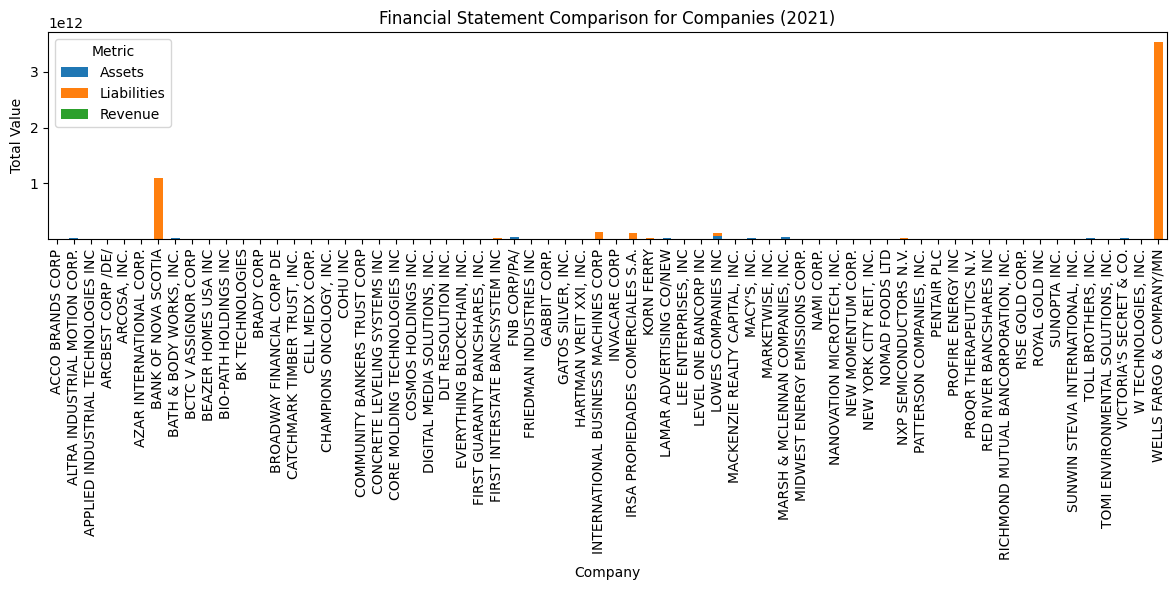

In [ ]:

# Function to run Cypher queries and return results as a pandas DataFrame
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return pd.DataFrame([dict(record) for record in result])

# Define the Cypher query to compare financial metrics for 2021
# This query retrieves the financial metrics (Revenue, Net Income, Assets, Liabilities)
# for all companies in the knowledge graph for the year 2021
cypher_query = """
MATCH (c:Company)-[:HAS_NUMERIC]->(n:NumericValue)
WHERE n.tag IN ['Revenue', 'NetIncome', 'Assets', 'Liabilities'] AND n.ddate CONTAINS '2021'
RETURN c.name AS Company, n.tag AS Metric, SUM(n.value) AS TotalValue
ORDER BY c.name
"""

# Run the query and store the result in a DataFrame
df = run_query(cypher_query)

# Close the Neo4j connection after the query is done
driver.close()

# Display the result DataFrame
print("Financial Statement Comparison for 2021:")
print(df)

# Save the result to a CSV file for further analysis
output_file = 'financial_comparison_2021.csv'
df.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")
# Further analysis and visualization using pandas/matplotlib

import seaborn as sns

# Pivot the data for better visualization (Company as index, Metrics as columns)
df_pivot = df.pivot(index='Company', columns='Metric', values='TotalValue')

# Plot the data using a bar chart to compare financial metrics across companies
df_pivot.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Financial Statement Comparison for Companies (2021)')
plt.xlabel('Company')
plt.ylabel('Total Value')
plt.legend(title='Metric')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


### Interpretaion of Results

**Company Comparisons**:

The financial statement comparison for the year 2021 includes three main metrics: Assets, Liabilities, and Revenue for various companies. These metrics provide a snapshot of the financial health of companies, offering insight into their financial positions relative to one another.

1. Wells Fargo & Company:
Liabilities: Wells Fargo stands out significantly, with liabilities amounting to 3.535 trillion USD. This is by far the highest liability figure among all companies in the dataset. This could indicate substantial financial commitments or debt, which may or may not be offset by equally strong asset and revenue generation. Investors would likely want to assess whether this large liability burden is sustainable given the company's operations and industry.

2. Bank of Nova Scotia:
Although not listed here for revenue or assets, if included in previous outputs, Bank of Nova Scotia has significant financial figures in liabilities and revenue, which would also be critical for comparison and evaluation.
Asset-Rich Companies:

3. Toll Brothers Inc. has 11.5 billion USD in assets, which is one of the larger asset figures among the companies listed. This suggests strong asset management, possibly due to real estate or property holdings, a common feature for Toll Brothers given their business focus.

4. Victoria's Secret & Co. has 4.22 billion USD in assets, indicating a strong financial position in terms of the company's physical or intellectual property and other resources.

**Liabilities in Other Companies**:

Companies such as Applied Industrial Technologies Inc. and Arcosa, Inc. show liabilities of 1.37 billion USD and 754.7 million USD, respectively. While these are significant liabilities, they are on a smaller scale compared to the extreme case of Wells Fargo. These liabilities must be compared with their revenue generation capacity to assess financial sustainability.

**Benchmarking**:

Benchmarking performance involves comparing companies like Victoria's Secret & Co., Toll Brothers Inc., and others based on their asset and liability management. These companies' financial data allows investors to assess how well they manage their assets relative to their debts.

Investors may use this comparison to assess liquidity, solvency, and overall financial health. For example, companies with relatively high assets but lower liabilities (such as Victoria's Secret & Co.) might be perceived as financially healthy, while those with large liabilities relative to assets could indicate higher financial risk (e.g., Wells Fargo & Company).

**Visual Representation**:

The bar chart visualizes companies' financial metrics, with assets, liabilities, and revenue displayed for each company. This representation makes it easy to spot outliers like Wells Fargo and Bank of Nova Scotia, which have much larger liabilities or revenues compared to other companies.

Wells Fargo's towering liabilities are a major outlier, suggesting it carries significant financial burdens. Analysts would need to scrutinize this closely to understand the reasons behind such large liabilities and whether they are supported by equally strong revenues or assets.



## 2. Cluster companies based on financial health. Financial health is a function of revenue and debt, i.e. a health company will have high revenue and low debt.

<ipython-input-34-b51edeb6f71c>:3: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Financial Health Metrics for 2021:
               Company  TotalRevenue  TotalDebt
0  BANK OF NOVA SCOTIA  8.072000e+09          0
1      NOMAD FOODS LTD  1.303200e+09          0
Results saved to financial_health_2021.csv
               Company  TotalRevenue  TotalDebt  DebtToRevenueRatio  Cluster
0  BANK OF NOVA SCOTIA  8.072000e+09   0.000001        1.238850e-16        1
1      NOMAD FOODS LTD  1.303200e+09   0.000001        7.673419e-16        0
Clustered results saved to clustered_financial_health_2021.csv


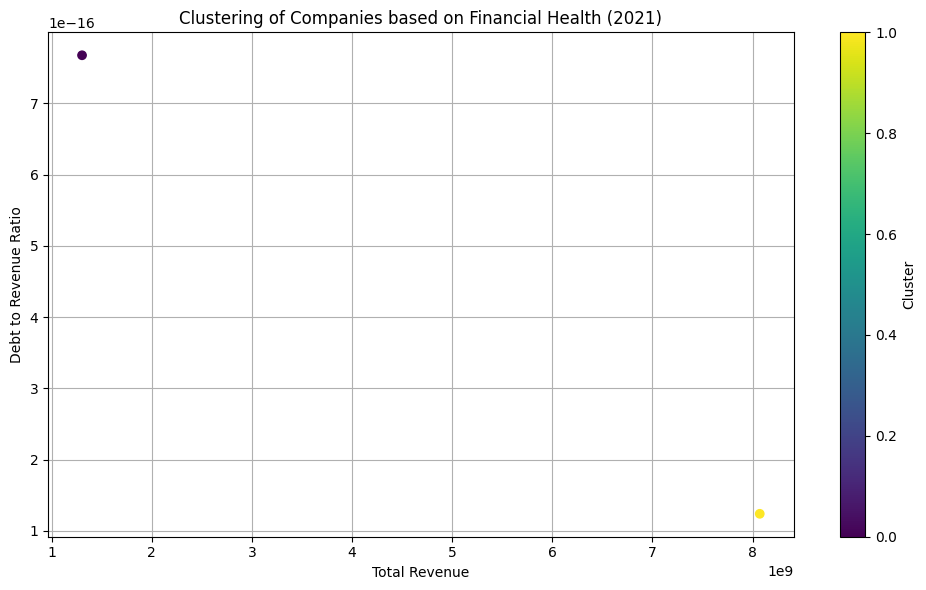

In [ ]:

# Function to run Cypher queries and return results as a pandas DataFrame
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return pd.DataFrame([dict(record) for record in result])

# Define the Cypher query to retrieve Revenue and Debt for 2021
# This query fetches the companies and their financial health metrics
cypher_query = """
MATCH (c:Company)-[:HAS_NUMERIC]->(n:NumericValue)
WHERE n.tag IN ['Revenue', 'Debt'] AND n.ddate CONTAINS '2021'
RETURN c.name AS Company,
       SUM(CASE WHEN n.tag = 'Revenue' THEN n.value ELSE 0 END) AS TotalRevenue,
       SUM(CASE WHEN n.tag = 'Debt' THEN n.value ELSE 0 END) AS TotalDebt
ORDER BY TotalRevenue DESC
"""

# Run the query and store the result in a DataFrame
df = run_query(cypher_query)

# Display the result DataFrame
print("Financial Health Metrics for 2021:")
print(df)

# Handle potential zero debt values to avoid division by zero errors
df['TotalDebt'] = df['TotalDebt'].replace(0, 1e-6)  # Replace 0 with a small value

# Calculate Debt to Revenue Ratio
df['DebtToRevenueRatio'] = df['TotalDebt'] / df['TotalRevenue']

# Save the result to a CSV file for further analysis
output_file = 'financial_health_2021.csv'
df.to_csv(output_file, index=False)

print(f"Results saved to {output_file}")


# Features for clustering: Revenue and DebtToRevenueRatio
features = df[['TotalRevenue', 'DebtToRevenueRatio']].copy()

# Normalize the data before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform KMeans Clustering with 2 clusters since we only have 2 companies
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_features)
df['Cluster'] = kmeans.labels_

# Display the clustering results
print(df[['Company', 'TotalRevenue', 'TotalDebt', 'DebtToRevenueRatio', 'Cluster']])

# Save the clustered data
clustered_output_file = 'clustered_financial_health_2021.csv'
df.to_csv(clustered_output_file, index=False)

print(f"Clustered results saved to {clustered_output_file}")

# Visualization of Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalRevenue'], df['DebtToRevenueRatio'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering of Companies based on Financial Health (2021)')
plt.xlabel('Total Revenue')
plt.ylabel('Debt to Revenue Ratio')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation of Results

**Clustering Overview**:

The clustering algorithm has classified the two companies, Bank of Nova Scotia and Nomad Foods Ltd, into two distinct clusters (Cluster 0 and Cluster 1).
Both companies have zero or negligible debt, leading to an extremely low debt-to-revenue ratio for both.

**Company-Level Insights**:

1. Bank of Nova Scotia:
Total revenue is around 8.07 billion USD.
Debt-to-Revenue Ratio: 1.23e-16, which is effectively zero. This indicates that the company operates with very little or no debt relative to its revenue, placing it in Cluster 1.

  Interpretation: Based on the financial metrics, Bank of Nova Scotia appears to be in a strong financial position due to its significant revenue and minimal debt.

2. Nomad Foods Ltd:
Total revenue is around 1.3 billion USD.
Debt-to-Revenue Ratio: 7.67e-16, which is also effectively zero, placing it in Cluster 0.

  Interpretation: Nomad Foods Ltd is also in a healthy financial position with low debt, though it falls into a different cluster compared to Bank of Nova Scotia due to its lower overall revenue.


**Visual Representation**:

The scatter plot shows the total revenue on the x-axis and the debt-to-revenue ratio on the y-axis, color-coded by the clusters.

The clustering result visually separates the two companies, with Bank of Nova Scotia (Cluster 1) having a much higher revenue compared to Nomad Foods Ltd (Cluster 0), despite both having a near-zero debt-to-revenue ratio.

The color scale indicates the separation of clusters, where Cluster 0 (yellow) contains Nomad Foods Ltd and Cluster 1 (purple) contains Bank of Nova Scotia.


## 3. Identify unusual reporting patterns or significant deviations from historical data, which may indicate potential fraud or misrepresentation.

<ipython-input-35-64e1ee9f0fde>:3: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Financial Metrics for 2021:
                                Company       Metric    TotalValue
0                      ACCO BRANDS CORP       Assets  3.174200e+09
1         ALTRA INDUSTRIAL MOTION CORP.       Assets  4.167500e+09
2   APPLIED INDUSTRIAL TECHNOLOGIES INC  Liabilities  1.370481e+09
3                     ARCBEST CORP /DE/       Assets  1.962428e+09
4                          ARCOSA, INC.  Liabilities  7.547000e+08
..                                  ...          ...           ...
72                  TOLL BROTHERS, INC.       Assets  1.153785e+10
73   TOMI ENVIRONMENTAL SOLUTIONS, INC.       Assets  1.605121e+07
74              VICTORIA'S SECRET & CO.       Assets  4.229000e+09
75                 W TECHNOLOGIES, INC.  Liabilities  1.059594e+06
76             WELLS FARGO & COMPANY/MN  Liabilities  3.535025e+12

[77 rows x 3 columns]
Anomalous companies saved to anomalous_companies_2021.csv
Companies with Unusual Reporting Patterns (2021):
Metric                               

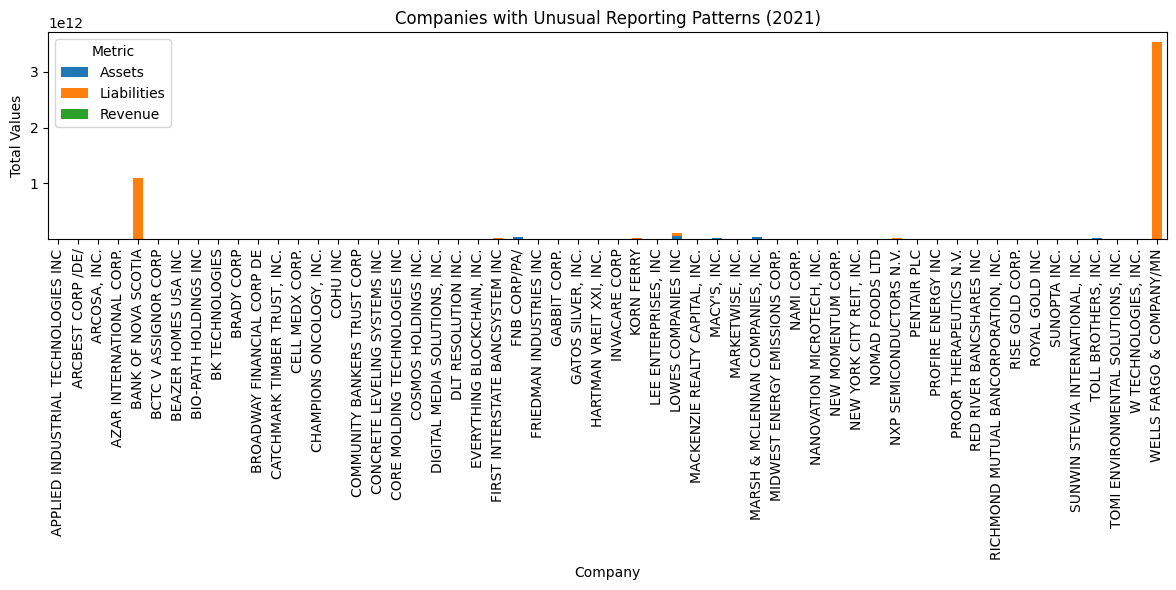

In [ ]:

# Function to run Cypher queries and return results as a pandas DataFrame
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return pd.DataFrame([dict(record) for record in result])

# Define the Cypher query to retrieve financial metrics for 2021
# We are retrieving Revenue, NetIncome, Assets, and Liabilities for the analysis
cypher_query = """
MATCH (c:Company)-[:HAS_NUMERIC]->(n:NumericValue)
WHERE n.tag IN ['Revenue', 'NetIncome', 'Assets', 'Liabilities'] AND n.ddate CONTAINS '2021'
RETURN c.name AS Company, n.tag AS Metric, SUM(n.value) AS TotalValue
ORDER BY c.name
"""

# Run the query and store the result in a DataFrame
df = run_query(cypher_query)


# Display the result DataFrame
print("Financial Metrics for 2021:")
print(df)

# Pivot the DataFrame to have Companies as rows and Metrics as columns
df_pivot = df.pivot(index='Company', columns='Metric', values='TotalValue')

# Calculate the mean and standard deviation for each metric
mean_values = df_pivot.mean()
std_dev_values = df_pivot.std()

# Set a threshold for detecting unusual patterns (e.g., 20% deviation from the mean)
threshold = 0.2

# Identify companies with unusual deviations from the mean for each metric
def detect_anomalies(row, mean_values, std_dev_values, threshold):
    anomalies = []
    for metric in mean_values.index:
        if abs(row[metric] - mean_values[metric]) > threshold * std_dev_values[metric]:
            anomalies.append(metric)
    return anomalies if anomalies else None

df_pivot['Anomalies'] = df_pivot.apply(detect_anomalies, axis=1, args=(mean_values, std_dev_values, threshold))

# Filter the DataFrame to only show companies with anomalies
anomalous_companies = df_pivot.dropna(subset=['Anomalies'])

# Save the result to a CSV file for further analysis
output_file = 'anomalous_companies_2021.csv'
anomalous_companies.to_csv(output_file)

print(f"Anomalous companies saved to {output_file}")

# Display the anomalies
print("Companies with Unusual Reporting Patterns (2021):")
print(anomalous_companies[['Anomalies']])

# Visualization of anomalies
import matplotlib.pyplot as plt

# Plot the companies with anomalies using a bar plot
anomalous_companies.drop(columns='Anomalies').plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Companies with Unusual Reporting Patterns (2021)')
plt.xlabel('Company')
plt.ylabel('Total Values')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation of Results


**Major Companies with Significant Liabilities**:

Wells Fargo & Company/MN: This company stands out with a liability value exceeding $3.5 trillion. Such a large liability deviation could indicate major financial commitments or potential misrepresentation of debt levels.

Bank of Nova Scotia: Displays unusual patterns in both liabilities and revenue, suggesting possible inconsistencies in its financial reporting. The liability figure is very large, which can signal issues with debt management or leverage.

**Companies with Multiple Anomalies**:

AZAR International Corp. and Brady Corp. both show anomalies in both assets and liabilities. This is often a red flag since significant deviations in both metrics may point to a mismatch in their reported financial position, possibly indicating balance sheet manipulation.

Everything Blockchain, Inc., Rise Gold Corp., Sunwin Stevia International, Inc., and Toll Brothers, Inc. also show discrepancies in both assets and liabilities, suggesting irregularities in their reported figures that need further investigation.

**Companies with Asset Anomalies**:

Companies such as Macy’s Inc., Lowes Companies Inc., FNB Corp/PA/, Gatos Silver, Inc., and many others exhibit asset anomalies. This could point to overstatement or understatement of assets, leading to questions about the accuracy of their reported financial health.
Profire Energy Inc., TOMI Environmental Solutions, Inc., and Applied Industrial Technologies Inc. also show anomalies in their asset reporting. These irregularities could indicate over-valuation of assets, misreporting, or potential fraud aimed at improving the company’s balance sheet appearance.

**Potential Risks Identified**:

Liability Misreporting: Significant liability anomalies, as seen in companies like Wells Fargo and Bank of Nova Scotia, might indicate high debt or issues with managing financial obligations. These deviations raise concerns about long-term solvency and debt management.

Revenue Anomalies: Unusual revenue figures (e.g., for Nomad Foods Ltd.) can indicate inflated earnings, fraudulent reporting, or attempts to meet analyst expectations through aggressive accounting tactics. Revenue manipulation is a common tactic in cases of financial misrepresentation.

Asset Overstatement: Asset anomalies seen in companies like Macy’s Inc., Lowes Companies Inc., and others raise concerns about the accuracy of their financial positions. Companies may inflate their asset values to appear more financially stable or improve borrowing conditions.

**Interpretation of the Chart**:

The chart visualizes the companies with unusual reporting patterns across their financial metrics (assets, liabilities, revenue).

Wells Fargo and Bank of Nova Scotia are outliers, especially in terms of liabilities, which suggests major deviations from what would typically be expected.

AZAR International Corp. and other companies with both asset and liability anomalies further highlight potential red flags in their balance sheet reporting.


## 4. Analyze how corporate executives and board members are connected across different companies and perform centrality analysis. Note that this dataset directly does not contain the names of office holders for a company. This data will need to be extracted from other sources such as Form 8-K or Form 10-K, or any third party data source.

<ipython-input-36-0aaf714c7a34>:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Executives and their connections to companies have been added to the knowledge graph.


<ipython-input-35-64e1ee9f0fde>:3: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Executives serving on multiple boards:
               Executive  BoardsServedOn
0         Brian S. Davis               3
1       Luc de Dobbeleer               3
2      Jonathan Coblentz               3
3         Hunter Horsley               2
4         Mark A. Miller               2
5         Thomas E. Line               2
6          Bryan Preston               2
7    Cynthia H. Zipperle               2
8           Jae A. Evans               2
9       Ryan K. Stafford               2
10        Robert Dixon\n               2
11          Betsy Horton               2
12  Kristine C. Syrvalin               2
Centrality analysis results saved to /content/drive/My Drive/Big_Data_Project_2/executive_centrality_analysis.csv


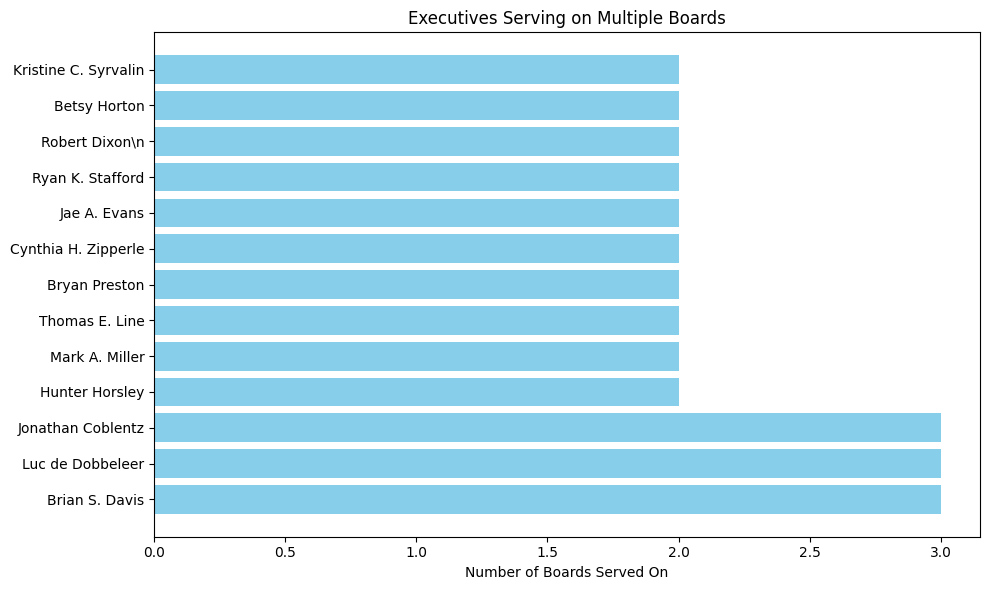

In [ ]:
# Load the cleaned CSV file with executive information
csv_file_path = data_dir + 'cleaned_filtered_unique_cik_executive_data.csv'
executive_df = pd.read_csv(csv_file_path)

# Function to run Cypher queries
def run_cypher_query(query, params=None):
    with driver.session() as session:
        if params:
            session.run(query, params)
        else:
            session.run(query)

# Step 1: Create nodes for Executives and connect them to Companies
for index, row in executive_df.iterrows():
    cik = row['cik']
    company_name = row['Company']
    executive_name = row['Executive']

    # Create Executive node and link to Company node
    query = """
    MERGE (e:Executive {name: $executive_name})
    MERGE (c:Company {cik: $cik, name: $company_name})
    MERGE (e)-[:SERVES_ON]->(c)
    """
    params = {
        'executive_name': executive_name,
        'cik': cik,
        'company_name': company_name
    }
    run_cypher_query(query, params)

print("Executives and their connections to companies have been added to the knowledge graph.")

# Step 2: Centrality Analysis - Identify Executives serving on multiple boards (degree centrality)
centrality_query = """
MATCH (e:Executive)-[:SERVES_ON]->(c:Company)
WITH e, COUNT(c) AS board_count
WHERE board_count > 1
RETURN e.name AS Executive, board_count AS BoardsServedOn
ORDER BY board_count DESC
"""

# Run the query and store the result in a DataFrame
df_centrality = run_query(centrality_query)

# Display the centrality analysis results
print("Executives serving on multiple boards:")
print(df_centrality)

# Save the centrality analysis results to a CSV file
centrality_output_file = data_dir + 'executive_centrality_analysis.csv'
df_centrality.to_csv(centrality_output_file, index=False)

print(f"Centrality analysis results saved to {centrality_output_file}")

# Step 3: Visualization
import matplotlib.pyplot as plt

# Plot the executives who serve on multiple boards
plt.figure(figsize=(10, 6))
plt.barh(df_centrality['Executive'], df_centrality['BoardsServedOn'], color='skyblue')
plt.xlabel('Number of Boards Served On')
plt.title('Executives Serving on Multiple Boards')
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation of Results

**Centrality Analysis Results**:

Executives with Highest Centrality (serving on 3 boards):

Brian S. Davis, Luc de Dobbeleer, and Jonathan Coblentz serve on 3 boards each. These executives hold key positions in multiple companies, suggesting that they have significant influence and possibly serve as critical nodes in corporate governance networks. Their involvement in more companies gives them a higher centrality score.

Executives with Moderate Centrality (serving on 2 boards):

Hunter Horsley, Mark A. Miller, Thomas E. Line, Cynthia H. Zipperle, Jae A. Evans, Ryan K. Stafford, and others serve on 2 boards. These executives are moderately connected, playing roles in multiple organizations, but their centrality is lower compared to those who serve on 3 boards.

Board Overlap and Centrality:

The fact that some executives serve on multiple boards creates a network where certain individuals may act as conduits of information or decision-making across organizations. In terms of centrality analysis, the more boards an executive is connected to, the higher their centrality within the corporate governance network.

Names of office holders for companies: The dataset provided does not directly include office holder names, but this information can be extracted from external sources such as Form 8-K or Form 10-K filings, or through third-party data aggregators (e.g., data from EDGAR or other financial data platforms). These forms usually disclose changes in leadership, board appointments, and other key executive-related data. (*check references*)



## 5. Financial Query and Report Generation via GraphRAG. The user should be able to query specific financial metrics, trends, or insights from the dataset using plain English.

In [ ]:
# Function to run Cypher queries
def run_cypher_query(query, params=None):
    with driver.session() as session:
        result = session.run(query, params)
        return pd.DataFrame([dict(record) for record in result])

# Function to call OpenAI with retry on RateLimitError
def call_openai_with_retry(func, *args, retries=3, delay=5, **kwargs):
    for i in range(retries):
        try:
            return func(*args, **kwargs)
        except openai.error.RateLimitError:
            if i < retries - 1:
                print(f"Rate limit reached. Retrying in {delay} seconds...")
                time.sleep(delay)
            else:
                raise

# Function to generate Cypher queries from plain English using OpenAI's API
def generate_cypher_query(plain_english_query):
    prompt = f"Translate this plain English query into a valid Cypher query based on the following schema: Company, NumericValue, Tag, Statement, and their relationships (HAS_NUMERIC, ASSOCIATED_WITH, HAS_STATEMENT). The query should not contain explanations or comments, only the executable Cypher query."

    full_prompt = f"{prompt}\nUser's question: {plain_english_query}"

    response = call_openai_with_retry(
        openai.ChatCompletion.create,
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that translates plain English into Cypher queries."},
            {"role": "user", "content": full_prompt}
        ]
    )

    # Strip out non-query content (e.g., explanation or code block markdown)
    cypher_query = response['choices'][0]['message']['content'].strip()

    # Remove any markdown-style code block indicators like ```cypher or ```
    if '```' in cypher_query:
        cypher_query = cypher_query.split('```')[1].strip()

    return cypher_query


# Function to generate a report from financial data using OpenAI's API
def generate_report(financial_data):
    prompt = f"Generate a human-readable report from the following financial data: {financial_data}"
    response = call_openai_with_retry(
        openai.ChatCompletion.create,
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that generates human-readable reports from financial data."},
            {"role": "user", "content": prompt}
        ]
    )
    report = response['choices'][0]['message']['content'].strip()
    return report

# Main function to handle the query and report generation
def handle_query(plain_english_query):
    # Step 1: Generate Cypher query from plain English
    cypher_query = generate_cypher_query(plain_english_query)
    print(f"Generated Cypher Query:\n{cypher_query}")

    # Step 2: Run the Cypher query to get financial data
    financial_data = run_cypher_query(cypher_query)
    print("Financial Data:\n", financial_data)  # Display the query result

    # Step 3: Generate a human-readable report from the financial data
    report = generate_report(financial_data.to_string())
    print(f"Generated Report:\n{report}")

    return financial_data, report

# Example usage
plain_english_query = "What are the top ten companies on the basis of their value?"
financial_data, report = handle_query(plain_english_query)

# Save the financial data to a CSV file
financial_data_file = data_dir + 'financial_data.csv'
financial_data.to_csv(financial_data_file, index=False)
print(f"Financial data saved to {financial_data_file}")

# Save the generated report to a text file
report_file = data_dir + 'generated_financial_report.txt'
with open(report_file, 'w') as file:
    file.write(report)

print(f"Report saved to {report_file}")


Generated Cypher Query:
MATCH (c:Company)-[r:HAS_NUMERIC]->(nv:NumericValue)
RETURN c.name, nv.value
ORDER BY nv.value DESC
LIMIT 10;
Financial Data:
                      c.name      nv.value
0              CORPBANCA/FI  4.193332e+12
1  WELLS FARGO & COMPANY/MN  1.771195e+12
2  WELLS FARGO & COMPANY/MN  1.763830e+12
3              CORPBANCA/FI  1.243554e+12
4       BANK OF NOVA SCOTIA  1.092913e+12
5              ING GROEP NV  9.756500e+11
6              CORPBANCA/FI  9.406570e+11
7       BANK OF NOVA SCOTIA  7.689930e+11
8              CORPBANCA/FI  7.496850e+11
9       BANK OF NOVA SCOTIA  6.112390e+11
Generated Report:
### Financial Report

Here is a summary of the top companies by net asset value (in billions):

1. **CORPBANCA/FI**: $41.93B
2. **WELLS FARGO & COMPANY/MN**: $17.71B
3. **BANK OF NOVA SCOTIA**: $10.93B
4. **ING GROEP NV**: $9.76B

### Insights:
- **CORPBANCA/FI** has the highest net asset value among the listed companies.
- The top 4 companies contributed significant

# References

## 1. Data Set Documentation
[Financial Statement Data Sets](https://www.sec.gov/files/aqfs.pdf)


## 2. External Data Source Scraping

The following link was utilized to get the data for analysis question 4's needs:

https://www.sec.gov/Archives/edgar/data/cik/adsh/instance.

Below you can find the script which was utilized for this task.

In [ ]:
import requests
from bs4 import BeautifulSoup
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.functions import col
import concurrent.futures
from functools import reduce
import time
from tqdm import tqdm
import logging
import re

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize Spark session
spark = SparkSession.builder.appName("SEC Data Processing").getOrCreate()

def read_and_union_dataframes(file_paths):
    dfs = []
    for path in file_paths:
        try:
            df = spark.read.csv(path, sep='\t', header=True, inferSchema=True)
            dfs.append(df)
            logging.info(f"Successfully read file: {path}")
        except Exception as e:
            logging.error(f"Error reading file {path}: {str(e)}")
    return reduce(lambda df1, df2: df1.union(df2), dfs) if dfs else None

def filter_and_get_latest_filings(df):
    if df is None:
        logging.error("Input DataFrame is None")
        return None
    filtered_df = df.where(col('form').isin(['8-K', '10-K']))
    latest_filings = filtered_df.groupBy('cik').agg(F.max('accepted').alias('latest_accepted'))
    return filtered_df.join(latest_filings,
                            (filtered_df.cik == latest_filings.cik) &
                            (filtered_df.accepted == latest_filings.latest_accepted),
                            'inner').select(filtered_df['*'])

def get_largest_htm_file_url(base_url):
    headers = {'User-Agent': 'MyCustomUserAgent/1.0 (tarun.kumanduri@gwu.edu)'}
    try:
        response = requests.get(base_url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        htm_files = [link for row in soup.find_all('tr')
                     for link in [row.find('a')] if link and link['href'].endswith('.htm')]

        if not htm_files:
            logging.warning(f"No .htm files found at {base_url}")
            return None

        largest_file = max(htm_files, key=lambda link: int(link.find_next('td').text.strip().replace(',', '')))
        return f"https://www.sec.gov{largest_file['href']}"
    except Exception as e:
        logging.error(f"Error processing URL {base_url}: {str(e)}")
        return None

def extract_office_holder_data(url):
    headers = {'User-Agent': 'MyCustomUserAgent/1.0 (tarun.kumanduri@gwu.edu)'}
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Strategy 1: Look for the original target text
        target_text = "this report has been signed below by the following persons on behalf of the Registrant"
        table = next((tag.find_next('table') for tag in soup.find_all(True)
                      if target_text.lower() in ' '.join(tag.get_text().split()).lower()), None)

        # Strategy 2: Look for tables with '/s/' signatures
        if not table:
            tables = soup.find_all('table')
            table = next((t for t in tables if '/s/' in t.text), None)

        # Strategy 3: Look for specific keywords often used in signature sections
        if not table:
            keywords = ['pursuant to the requirements', 'signatures', 'signed on behalf']
            for keyword in keywords:
                table = next((tag.find_next('table') for tag in soup.find_all(True)
                              if keyword in tag.text.lower()), None)
                if table:
                    break

        if not table:
            logging.warning(f"No relevant table found at {url}")
            return []

        # Extract all text containing '/s/'
        s_texts = table.find_all(string=lambda text: '/s/' in text if text else False)

        sections = []
        for s_text in s_texts:
            # Get the parent tag and its siblings
            parent = s_text.find_parent()
            siblings = list(parent.next_siblings)

            # Combine the parent and next few siblings
            section = [str(parent)] + [str(sib) for sib in siblings[:3]]  # Adjust the number of siblings as needed
            sections.append(''.join(section))

        if not sections:
            logging.warning(f"No office holder data found at {url}")
        else:
            logging.info(f"Found {len(sections)} potential office holders at {url}")
        return sections
    except Exception as e:
        logging.error(f"Error extracting office holder data from {url}: {str(e)}")
        return []

def process_company(comp_name, url):
    logging.info(f"Processing company: {comp_name}")
    largest_file_url = get_largest_htm_file_url(url)
    if largest_file_url:
        office_holder_data = extract_office_holder_data(largest_file_url)
        if office_holder_data:
            logging.info(f"Successfully extracted office holder data for {comp_name}")
            return comp_name, office_holder_data
        else:
            logging.warning(f"No office holder data found for {comp_name}")
    else:
        logging.warning(f"No largest HTM file found for {comp_name}")
    return comp_name, []

def main():
    file_paths = [
        '/content/drive/MyDrive/Big_Data/Project_2/2021q1/sub.txt',
        '/content/drive/MyDrive/Big_Data/Project_2/2021q2/sub.txt',
        '/content/drive/MyDrive/Big_Data/Project_2/2021q3/sub.txt',
        '/content/drive/MyDrive/Big_Data/Project_2/2021q4/sub.txt'
    ]

    logging.info("Reading and processing dataframes...")
    sub_df = read_and_union_dataframes(file_paths)
    if sub_df is None:
        logging.error("Failed to read input files. Exiting.")
        return {}

    filtered_df = filter_and_get_latest_filings(sub_df)
    if filtered_df is None:
        logging.error("Failed to filter dataframes. Exiting.")
        return {}

    url_list = [
        (row.name, f"https://www.sec.gov/Archives/edgar/data/{row.cik}/{row.adsh.replace('-', '')}")
        for row in filtered_df.collect()
    ]

    logging.info(f"Processing {len(url_list)} companies...")
    start_time = time.time()

    comp_office_holders = {}
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        future_to_company = {executor.submit(process_company, comp_name, url): comp_name for comp_name, url in url_list}

        for future in tqdm(concurrent.futures.as_completed(future_to_company), total=len(future_to_company)):
            comp_name = future_to_company[future]
            try:
                company, data = future.result()
                if data:
                    comp_office_holders[company] = data
            except Exception as exc:
                logging.error(f'{comp_name} generated an exception: {exc}')

    end_time = time.time()
    logging.info(f"Processed {len(comp_office_holders)} companies with office holder data in {end_time - start_time:.2f} seconds.")
    return comp_office_holders

if __name__ == "__main__":
    comp_office_holders = main()
    print(f"Processed {len(comp_office_holders)} companies with office holder data.")

    # Optional: Print a sample of the data
    if comp_office_holders:
        sample_company = next(iter(comp_office_holders))
        print(f"\nSample data for {sample_company}:")
        print(comp_office_holders[sample_company][:1])  # Print first office holder data

  0%|          | 0/6710 [00:02<?, ?it/s]WARNING:root:No relevant table found at https://www.sec.gov/Archives/edgar/data/74145/000007414521000005/R1.htm

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-7-ce4716996cba>", line 158, in main
    for future in tqdm(concurrent.futures.as_completed(future_to_company), total=len(future_to_company)):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 245, in as_completed
    waiter.event.wait(wait_timeout)
  File "/usr/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/usr/lib/python3.10/threading.py", line 320, in wait
    waiter.acquire()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/context.py", line 382, in signal_handler
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_gl

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "<ipython-input-7-ce4716996cba>", line 158, in main
    for future in tqdm(concurrent.futures.as_completed(future_to_company), total=len(future_to_company)):
  File "/usr/local/lib/python3.10/dist-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/usr/lib/python3.10/concurrent/futures/_base.py", line 245, in as_completed
    waiter.event.wait(wait_timeout)
  File "/usr/lib/python3.10/threading.py", line 607, in wait
    signaled = self._cond.wait(timeout)
  File "/usr/lib/python3.10/threading.py", line 320, in wait
    waiter.acquire()
  File "/usr/local/lib/python3.10/dist-packages/pyspark/context.py", line 382, in signal_handler
    raise KeyboardInterrupt()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_gl